In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-datasets/FPT.csv
/kaggle/input/stock-datasets/VIC.csv
/kaggle/input/stock-datasets/PNJ.csv
/kaggle/input/stock-datasets/MSN.csv


# Bước 1: Import thư viện

In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# Bước 2: Chuẩn bị dữ liệu

In [4]:
fpt_df = pd.read_csv('/kaggle/input/stock-datasets/FPT.csv')

In [5]:
fpt_df.shape

(97406, 8)

In [6]:
fpt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97406 entries, 0 to 97405
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ticker         97406 non-null  object 
 1   Date/Time      97406 non-null  object 
 2   Open           97406 non-null  float64
 3   High           97406 non-null  float64
 4   Low            97406 non-null  float64
 5   Close          97406 non-null  float64
 6   Volume         97406 non-null  int64  
 7   Open Interest  97406 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 5.9+ MB


In [7]:
fpt_df.describe

<bound method NDFrame.describe of       Ticker         Date/Time   Open   High    Low  Close  Volume  \
0        FPT   12/25/2018 9:15  30.89  30.89  30.89  30.89   35410   
1        FPT   12/25/2018 9:16  30.81  30.81  30.81  30.81     190   
2        FPT   12/25/2018 9:17  30.74  30.81  30.74  30.74    1120   
3        FPT   12/25/2018 9:18  30.74  30.74  30.74  30.74    2120   
4        FPT   12/25/2018 9:19  30.74  30.74  30.74  30.74   22500   
...      ...               ...    ...    ...    ...    ...     ...   
97401    FPT  12/22/2020 14:24  58.20  58.20  58.20  58.20   27470   
97402    FPT  12/22/2020 14:25  58.20  58.20  58.20  58.20   14820   
97403    FPT  12/22/2020 14:26  58.20  58.20  58.20  58.20     500   
97404    FPT  12/22/2020 14:29  58.10  58.10  58.10  58.10    2500   
97405    FPT  12/22/2020 14:46  58.10  58.10  58.10  58.10   11170   

       Open Interest  
0                  0  
1                  0  
2                  0  
3                  0  
4         

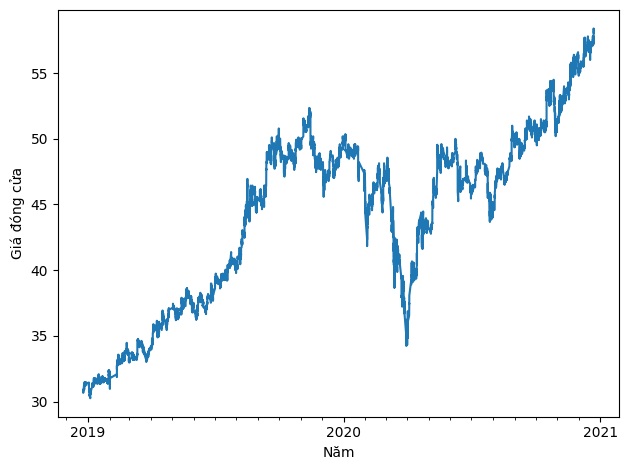

In [8]:
from matplotlib.dates import YearLocator, DateFormatter, MonthLocator

fpt_df['Date/Time'] = pd.to_datetime(fpt_df['Date/Time'])

plt.plot(fpt_df['Date/Time'], fpt_df['Close'])
plt.xlabel('Năm')
plt.ylabel('Giá đóng cửa')

years = YearLocator()
yearsFmt = DateFormatter('%Y')
months = MonthLocator() 
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_minor_locator(months)

plt.tight_layout()
plt.show()

In [9]:
fpt_df = fpt_df.drop(columns=['Ticker','Date/Time','Open Interest','Volume'])
fpt_df.head()

,Open,High,Low,Close
0,30.89,30.89,30.89,30.89
1,30.81,30.81,30.81,30.81
2,30.74,30.81,30.74,30.74
3,30.74,30.74,30.74,30.74
4,30.74,30.74,30.74,30.74


In [10]:
data = fpt_df.values
data

array([[30.89, 30.89, 30.89, 30.89],
       [30.81, 30.81, 30.81, 30.81],
       [30.74, 30.81, 30.74, 30.74],
       ...,
       [58.2 , 58.2 , 58.2 , 58.2 ],
       [58.1 , 58.1 , 58.1 , 58.1 ],
       [58.1 , 58.1 , 58.1 , 58.1 ]])

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data)
data

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


array([[-2.22989656, -2.23100117, -2.2286678 , -2.22989816],
       [-2.24247563, -2.24357006, -2.24125787, -2.24247724],
       [-2.25348232, -2.24357006, -2.25227418, -2.25348393],
       ...,
       [ 2.06428361,  2.05970641,  2.06926817,  2.06428487],
       [ 2.04855977,  2.04399529,  2.05353058,  2.04856102],
       [ 2.04855977,  2.04399529,  2.05353058,  2.04856102]])

In [12]:
split_index = int(len(data) * 0.8)

train_data = data[:split_index]
test_data = data[split_index:]

In [13]:
train_data

array([[-2.22989656, -2.23100117, -2.2286678 , -2.22989816],
       [-2.24247563, -2.24357006, -2.24125787, -2.24247724],
       [-2.25348232, -2.24357006, -2.25227418, -2.25348393],
       ...,
       [ 0.45259021,  0.44931635,  0.45616514,  0.4525904 ],
       [ 0.45259021,  0.45717191,  0.45616514,  0.46045232],
       [ 0.46045213,  0.45717191,  0.45616514,  0.46045232]])

In [14]:
sequence_length = 7  # Độ dài của mỗi chuỗi thời gian
x_train_sequences = []
y_train = []

x_test_sequences = []
y_test = []

for i in range(len(train_data) - sequence_length):
    x_sequence = train_data[i:i+sequence_length] #dùng dữ liệu của 20 ngày trước để dự đoán ngày hiện tại
    y_label = train_data[i+sequence_length]
    x_train_sequences.append(x_sequence)
    y_train.append(y_label)
    
for i in range(len(test_data) - sequence_length):
    x_sequence = test_data[i:i+sequence_length] #dùng dữ liệu của 20 ngày trước để dự đoán ngày hiện tại
    y_label = test_data[i+sequence_length]
    x_test_sequences.append(x_sequence)
    y_test.append(y_label)

In [15]:
x_train_sequences = torch.tensor(x_train_sequences, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

x_test_sequences = torch.tensor(x_test_sequences, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

/tmp/ipykernel_26/2927039095.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /usr/local/src/pytorch/torch/csrc/utils/tensor_new.cpp:245.)
  x_train_sequences = torch.tensor(x_train_sequences, dtype=torch.float32)


In [16]:
x_train_sequences

tensor([[[-2.2299, -2.2310, -2.2287, -2.2299],
         [-2.2425, -2.2436, -2.2413, -2.2425],
         [-2.2535, -2.2436, -2.2523, -2.2535],
         ...,
         [-2.2535, -2.2546, -2.2523, -2.2535],
         [-2.2535, -2.2546, -2.2586, -2.2535],
         [-2.2661, -2.2546, -2.2759, -2.2661]],

        [[-2.2425, -2.2436, -2.2413, -2.2425],
         [-2.2535, -2.2436, -2.2523, -2.2535],
         [-2.2535, -2.2546, -2.2523, -2.2535],
         ...,
         [-2.2535, -2.2546, -2.2586, -2.2535],
         [-2.2661, -2.2546, -2.2759, -2.2661],
         [-2.2063, -2.1964, -2.2051, -2.1953]],

        [[-2.2535, -2.2436, -2.2523, -2.2535],
         [-2.2535, -2.2546, -2.2523, -2.2535],
         [-2.2535, -2.2546, -2.2523, -2.2535],
         ...,
         [-2.2661, -2.2546, -2.2759, -2.2661],
         [-2.2063, -2.1964, -2.2051, -2.1953],
         [-2.1827, -2.1839, -2.1815, -2.1827]],

        ...,

        [[ 0.4526,  0.4493,  0.4483,  0.4447],
         [ 0.4447,  0.4572,  0.4404,  0.4447]

In [17]:
x_train_sequences.shape

torch.Size([77917, 7, 4])

In [18]:
from torch.utils.data import TensorDataset, DataLoader
batch_size = 16

train_dataset = TensorDataset(x_train_sequences, y_train)
test_dataset = TensorDataset(x_test_sequences, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


In [19]:
train_dataset[0]

(tensor([[-2.2299, -2.2310, -2.2287, -2.2299],
         [-2.2425, -2.2436, -2.2413, -2.2425],
         [-2.2535, -2.2436, -2.2523, -2.2535],
         [-2.2535, -2.2546, -2.2523, -2.2535],
         [-2.2535, -2.2546, -2.2523, -2.2535],
         [-2.2535, -2.2546, -2.2586, -2.2535],
         [-2.2661, -2.2546, -2.2759, -2.2661]]),
 tensor([-2.2063, -2.1964, -2.2051, -2.1953]))

# Bước 3: Xây dựng và huấn luyện mô hình

In [20]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers #là số lượng tầng LSTM được xếp chồng lên nhau

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, 4)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(4, 4, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(4, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=4, bias=True)
)

In [21]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
    
    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
            
    avg_loss_across_batches = running_loss / len(train_loader)
    print(f"Loss: {avg_loss_across_batches}")

In [22]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0
    
    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)
    
    print(f'Val Loss: {avg_loss_across_batches}')

In [23]:
learning_rate = 0.01
num_epochs = 50
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Loss: 0.0071327439749670355
Val Loss: 0.03478051768450371
Epoch: 2
Loss: 0.00015809282822280995
Val Loss: 0.02631016720705402
Epoch: 3
Loss: 0.00014677787963457518
Val Loss: 0.025889399681674346
Epoch: 4
Loss: 0.00013840727819940728
Val Loss: 0.023907100354512077
Epoch: 5
Loss: 0.0001288501626263132
Val Loss: 0.009246802426351246
Epoch: 6
Loss: 0.00012948801882638647
Val Loss: 0.0026466596287817424
Epoch: 7
Loss: 0.00012111969565303597
Val Loss: 0.000598782504135888
Epoch: 8
Loss: 0.00012154251160635565
Val Loss: 0.0007592833505526502
Epoch: 9
Loss: 0.00011849374049826041
Val Loss: 0.0012082382813914203
Epoch: 10
Loss: 0.00011380859020337495
Val Loss: 0.0019233510780882446
Epoch: 11
Loss: 0.00011144871326087574
Val Loss: 0.00042424313506956993
Epoch: 12
Loss: 0.00011019914816837219
Val Loss: 0.0010088919199903888
Epoch: 13
Loss: 0.00010729552857593996
Val Loss: 0.0019133001192422122
Epoch: 14
Loss: 0.00011037777953200186
Val Loss: 0.0008033606556132319
Epoch: 15
Loss: 0.000107

# Bước 4: Thực hiện đánh giá trên tập test

In [24]:
test_predictions = model(x_test_sequences.to(device)).detach().cpu().numpy()
test_predictions

array([[0.4888997 , 0.49089727, 0.49051505, 0.49520278],
       [0.48384148, 0.48570696, 0.48543555, 0.4899444 ],
       [0.4836409 , 0.4854397 , 0.48525286, 0.48966557],
       ...,
       [1.8816342 , 1.8825892 , 1.9051307 , 1.9036028 ],
       [1.8816233 , 1.8825608 , 1.9051543 , 1.9035981 ],
       [1.8799498 , 1.8806926 , 1.9031731 , 1.901561  ]], dtype=float32)

In [25]:
test_predictions = scaler.inverse_transform(test_predictions)

In [26]:
open_price_pred = test_predictions[:, 0]
high_price_pred = test_predictions[:, 1]
low_price_pred = test_predictions[:, 2]
close_price_pred = test_predictions[:, 3]

open_price_pred

array([48.18092 , 48.14875 , 48.147476, ..., 57.03839 , 57.038322,
       57.02768 ], dtype=float32)

In [27]:
y_test = y_test.detach().numpy()
y_test = scaler.inverse_transform(y_test)

In [28]:
open_price_actual = y_test[:, 0]
high_price_actual = y_test[:, 1]
low_price_actual = y_test[:, 2]
close_price_actual = y_test[:, 3]

open_price_actual

array([48.15, 48.15, 48.15, ..., 58.2 , 58.1 , 58.1 ], dtype=float32)

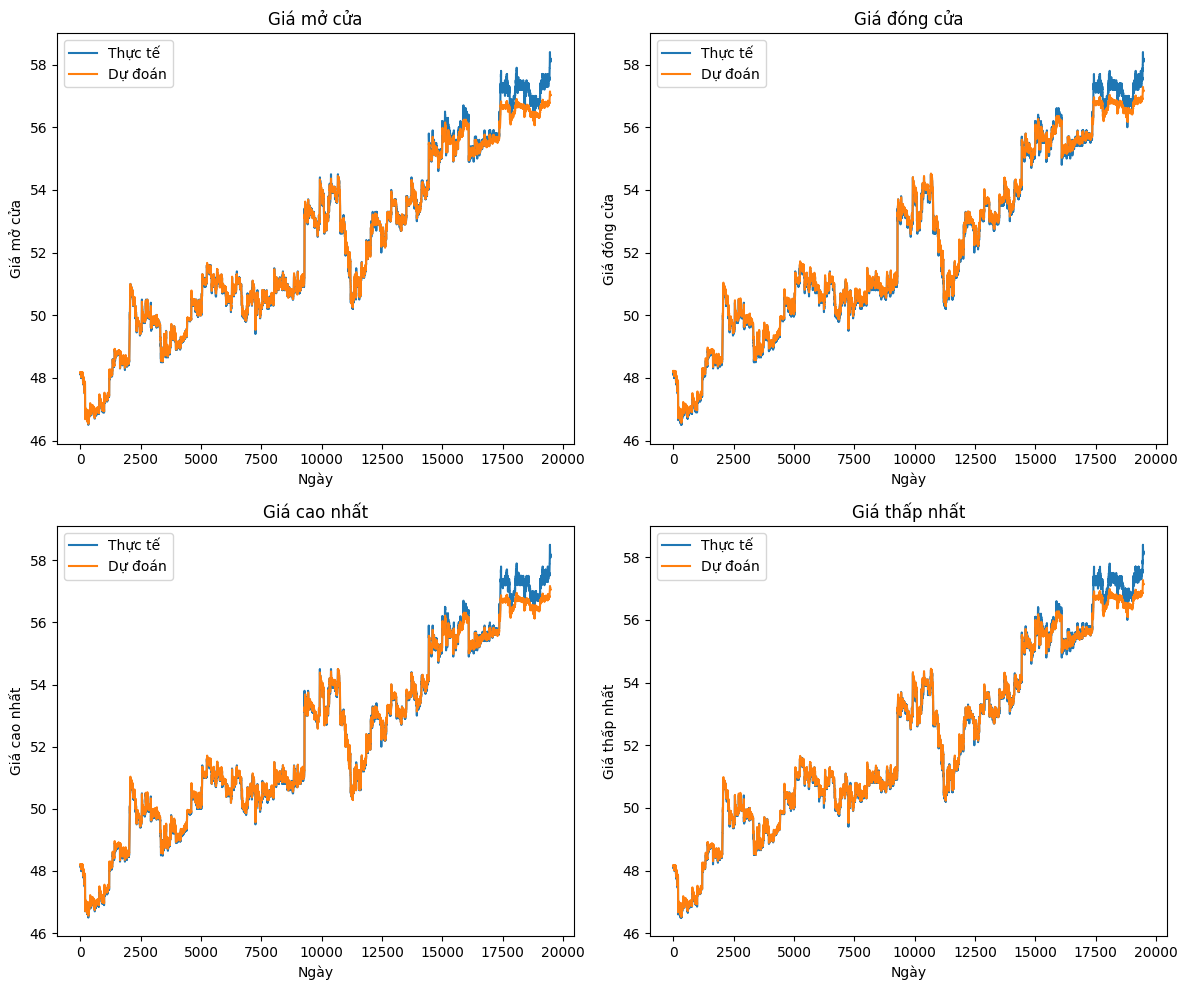

In [29]:
# Tạo 4 biểu đồ nhỏ
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Biểu đồ 1: Giá mở cửa
axes[0, 0].plot(open_price_actual, label='Thực tế')
axes[0, 0].plot(open_price_pred, label='Dự đoán')
axes[0, 0].set_title('Giá mở cửa')
axes[0, 0].set_xlabel('Ngày')
axes[0, 0].set_ylabel('Giá mở cửa')
axes[0, 0].legend()

# Biểu đồ 2: Giá đóng cửa
axes[0, 1].plot(close_price_actual, label='Thực tế')
axes[0, 1].plot(close_price_pred, label='Dự đoán')
axes[0, 1].set_title('Giá đóng cửa')
axes[0, 1].set_xlabel('Ngày')
axes[0, 1].set_ylabel('Giá đóng cửa')
axes[0, 1].legend()

# Biểu đồ 3: Giá cao nhất
axes[1, 0].plot(high_price_actual, label='Thực tế')
axes[1, 0].plot(high_price_pred, label='Dự đoán')
axes[1, 0].set_title('Giá cao nhất')
axes[1, 0].set_xlabel('Ngày')
axes[1, 0].set_ylabel('Giá cao nhất')
axes[1, 0].legend()

# Biểu đồ 4: Giá thấp nhất
axes[1, 1].plot(low_price_actual, label='Thực tế')
axes[1, 1].plot(low_price_pred, label='Dự đoán')
axes[1, 1].set_title('Giá thấp nhất')
axes[1, 1].set_xlabel('Ngày')
axes[1, 1].set_ylabel('Giá thấp nhất')
axes[1, 1].legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


In [30]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

print('Đánh giá độ chính xác của open price')
print('***************************')
#r2
print('Độ phù hợp tập test:',r2_score(open_price_actual,open_price_pred))
#mae
print('Sai số tuyệt đối trung bình trên tập test:',mean_absolute_error(open_price_actual, open_price_pred))
#mae
print('Phần trăm sai số tuyệt đối trung bình tập test:',mean_absolute_percentage_error(open_price_actual,open_price_pred))

print('Đánh giá độ chính xác của close price')
print('***************************')
#r2
print('Độ phù hợp tập test:',r2_score(close_price_actual,close_price_pred))
#mae
print('Sai số tuyệt đối trung bình trên tập test:',mean_absolute_error(close_price_actual, close_price_pred))
#mae
print('Phần trăm sai số tuyệt đối trung bình tập test:',mean_absolute_percentage_error(close_price_actual,close_price_pred))

print('Đánh giá độ chính xác của high price')
print('***************************')
#r2
print('Độ phù hợp tập test:',r2_score(high_price_actual,high_price_pred))
#mae
print('Sai số tuyệt đối trung bình trên tập test:',mean_absolute_error(high_price_actual, high_price_pred))
#mae
print('Phần trăm sai số tuyệt đối trung bình tập test:',mean_absolute_percentage_error(high_price_actual,high_price_pred))

print('Đánh giá độ chính xác của low price')
print('***************************')
#r2
print('Độ phù hợp tập test:',r2_score(low_price_actual,low_price_pred))
#mae
print('Sai số tuyệt đối trung bình trên tập test:',mean_absolute_error(low_price_actual, low_price_pred))
#mae
print('Phần trăm sai số tuyệt đối trung bình tập test:',mean_absolute_percentage_error(low_price_actual,low_price_pred))




Đánh giá độ chính xác của open price
***************************
Độ phù hợp tập test: 0.9947259591708315
Sai số tuyệt đối trung bình trên tập test: 0.107317284
Phần trăm sai số tuyệt đối trung bình tập test: 0.0019481466
Đánh giá độ chính xác của close price
***************************
Độ phù hợp tập test: 0.9960082238709325
Sai số tuyệt đối trung bình trên tập test: 0.11712476
Phần trăm sai số tuyệt đối trung bình tập test: 0.0021741334
Đánh giá độ chính xác của high price
***************************
Độ phù hợp tập test: 0.9951115564560108
Sai số tuyệt đối trung bình trên tập test: 0.11059394
Phần trăm sai số tuyệt đối trung bình tập test: 0.0020244112
Đánh giá độ chính xác của low price
***************************
Độ phù hợp tập test: 0.9959823650774553
Sai số tuyệt đối trung bình trên tập test: 0.09924251
Phần trăm sai số tuyệt đối trung bình tập test: 0.0018154173
